# Average running-time figure

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pickle

from mixmarkov.plotting import setup_plotting

In [2]:
setup_plotting()

Plotting settings loaded!


In [3]:
with open("../../data/runningtime.pickle", "rb") as f:
    res = pickle.load(f)

In [4]:
mat = np.array(list(res.values()))
norm = mat / mat[:,:1]

qs = np.quantile(norm, (0.25, 0.5, 0.75), axis=0)

print(norm)

[[  1.          23.94503539  41.70269714]
 [  1.           3.81077563 102.70132823]
 [  1.           5.97207606 175.86442507]
 [  1.           4.21066424 306.56677825]]


In [5]:
qs

array([[  1.        ,   4.11069209,  87.45167046],
       [  1.        ,   5.09137015, 139.28287665],
       [  1.        ,  10.46531589, 208.54001337]])

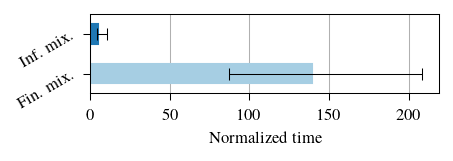

In [6]:
fig, ax = plt.subplots(figsize=(3.0, 0.7))

idx = np.arange(2)
xs = np.array([qs[1,2], qs[1,1]])
xerr = np.array([
    [qs[1,2] - qs[0,2], qs[1,1] - qs[0,1]],  # lower errors.
    [qs[2,2] - qs[1,2], qs[2,1] - qs[1,1]],  # upper errors.
])

bar1, bar2 = ax.barh(idx, xs, height=0.5, xerr=xerr, capsize=3, error_kw={"elinewidth": 0.5, "capthick": 0.5})
bar1.set_color(plt.cm.Paired(0))
bar2.set_color(plt.cm.Paired(1))
ax.grid(axis="x", lw=0.5)
ax.set_axisbelow(True)
ax.set_xlabel("Normalized time")
ax.set_yticks(idx)
ax.set_yticklabels(["Fin. mix.", "Inf. mix."], ha="right", rotation=30)
#ax.tick_params(axis='y', labelsize=6, pad=1.5)
#ax.tick_params(axis='x', labelsize=6, pad=1.0)
ax.set_ylim(bottom=-0.5, top=1.5)
#ax.set_title("Running time", pad=4.0)

fig.savefig("runningtime.pdf", bbox_inches="tight")